In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/Users/mohamedafrith/Downloads/bank-full.csv")
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [ ]:
df=pd.read_csv("/Users/mohamedafrith/Downloads/bank-full.csv", sep=";", quotechar='"')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
for i in df.columns:
    print(i,df[i].unique())
    

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [ 2143    29     2 ...  8205 14204 16353]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration [ 261  151   76 ... 1298 1246 1556]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

In [ ]:
df.rename(columns={
    'age': "Client's age",
    'job': "Type of job",
    'marital': "Marital status",
    'education': "Client's education level",
    'default': "Whether the client has failed to pay back a previous loan or credit",
    'balance': "Average yearly account balance",
    'housing': "Whether the client has a housing loan",
    'loan': "Whether the client has a personal loan",
    'contact': "Contact communication type",
    'day': "Day of the last contact in the current campaign",
    'month': "Month of the last contact in the current campaign",
    'duration': "Duration of the last contact in seconds",
    'campaign': "Number of contacts performed during this campaign",
    'pdays': "Days passed since the client was last contacted in a previous campaign"
}, inplace=True)


In [ ]:
df.rename(columns={
    'previous': "Number of contacts performed before this campaign for this client",
    'poutcome': "Outcome of the previous marketing campaign",
    'y': "Whether the client subscribed to a term deposit"
}, inplace=True)

In [ ]:
df

,Client's age,Type of job,Marital status,Client's education level,Whether the client has failed to pay back a previous loan or credit,Average yearly account balance,Whether the client has a housing loan,Whether the client has a personal loan,Contact communication type,Day of the last contact in the current campaign,Month of the last contact in the current campaign,Duration of the last contact in seconds,Number of contacts performed during this campaign,Days passed since the client was last contacted in a previous campaign,Number of contacts performed before this campaign for this client,Outcome of the previous marketing campaign,Whether the client subscribed to a term deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df["Client's education level"].value_counts()/len(df)*100

Client's education level
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: count, dtype: float64

In [ ]:
df["Contact communication type"].value_counts()/len(df)*100

Contact communication type
cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: count, dtype: float64

In [ ]:
df["Outcome of the previous marketing campaign"].value_counts()/len(df)*100

Outcome of the previous marketing campaign
unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: count, dtype: float64

In [ ]:
# Replace Type of job values: 'unknown' → 'others', 'admin.' → 'admin'
df['Type of job'] = df['Type of job'].replace({'unknown': 'others', 'admin.': 'admin'})

# Find the mode (most frequent value) of the Client's education level column
mode_education = df["Client's education level"].mode()[0]

# Replace 'unknown' with the most frequent value (mode)
df["Client's education level"] = df["Client's education level"].replace('unknown', mode_education)

df["Client's education level"]=df["Client's education level"].replace({'tertiary': 'higher secondary'})

# Find the mode of the Contact communication type column
mode_Contact= df['Contact communication type'].mode()[0]

# Replace 'unknown' with the mode value
df['Contact communication type'] = df['Contact communication type'].replace('unknown', mode_Contact)

# Find the mode of the 'Outcome of the previous marketing campaign' column
mode_Outcome = df['Outcome of the previous marketing campaign'].mode()[0]

# Replace 'other' with the mode value
df['Outcome of the previous marketing campaign'] = df['Outcome of the previous marketing campaign'].replace('other', mode_Outcome)

df['Days passed since the client was last contacted in a previous campaign'] = df['Days passed since the client was last contacted in a previous campaign'].replace(-1, 0)




In [ ]:
euro_to_inr = 97.11  # as per 21/04/2025
df['Average yearly account balance'] = df['Average yearly account balance'] * euro_to_inr



In [ ]:
#changing seconds into minutes
df['Duration of the last contact in seconds'] = df['Duration of the last contact in seconds'] / 60

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Client's age                                                            45211 non-null  int64  
 1   Type of job                                                             45211 non-null  object 
 2   Marital status                                                          45211 non-null  object 
 3   Client's education level                                                45211 non-null  object 
 4   Whether the client has failed to pay back a previous loan or credit     45211 non-null  object 
 5   Average yearly account balance                                          45211 non-null  float64
 6   Whether the client has a housing loan                                   45211 

manual label (mapping) encoding

In [ ]:
for i in df.columns:
    print(i,df[i].unique())
    

Client's age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
Type of job ['management' 'technician' 'entrepreneur' 'blue-collar' 'others' 'retired'
 'admin' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
Marital status ['married' 'single' 'divorced']
Client's education level ['higher secondary' 'secondary' 'primary']
Whether the client has failed to pay back a previous loan or credit ['no' 'yes']
Average yearly account balance [2.08106730e+05 2.81619000e+03 1.94220000e+02 ... 7.96787550e+05
 1.37935044e+06 1.58803983e+06]
Whether the client has a housing loan ['yes' 'no']
Whether the client has a personal loan ['no' 'yes']
Contact communication type ['cellular' 'telephone']
Day of the last contact in the current campaign [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  

In [ ]:
job_mapping = {
    'management': 1,
    'technician': 2,
    'entrepreneur': 3,
    'blue-collar': 4,
    'others': 5,
    'retired': 6,
    'admin': 7,
    'services': 8,
    'self-employed': 9,
    'unemployed': 10,
    'housemaid': 11,
    'student': 12
}
df['Type of job'] = df['Type of job'].map(job_mapping)

marital_mapping = {
    'married': 1,
    'single': 2,
    'divorced': 3
}
df['Marital status'] = df['Marital status'].map(marital_mapping)


education_mapping = {
    'primary': 1,
    'secondary': 2,
    'higher secondary': 3
}
df["Client's education level"] = df["Client's education level"].map(education_mapping)


loan_default_mapping = {
    'no': 0,
    'yes': 1
}
df["Whether the client has failed to pay back a previous loan or credit"] = df["Whether the client has failed to pay back a previous loan or credit"].map(loan_default_mapping)

housing_mapping = {
    'yes': 1,
    'no': 0
}
df["Whether the client has a housing loan"] = df["Whether the client has a housing loan"].map(housing_mapping)

personal_loan_mapping = {
    'no': 0,
    'yes': 1
}
df["Whether the client has a personal loan"] = df["Whether the client has a personal loan"].map(personal_loan_mapping)

contact_mapping = {
    'cellular': 1,
    'telephone': 2
}
df["Contact communication type"] = df["Contact communication type"].map(contact_mapping)

month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}
df["Month of the last contact in the current campaign"] = df["Month of the last contact in the current campaign"].map(month_mapping)

poutcome_mapping = {
    'unknown': 0,
    'failure': 1,
    'success': 2
}
df["Outcome of the previous marketing campaign"] = df["Outcome of the previous marketing campaign"].map(poutcome_mapping)

term_deposit_mapping = {
    'no': 0,
    'yes': 1
}
df["Whether the client subscribed to a term deposit"] = df["Whether the client subscribed to a term deposit"].map(term_deposit_mapping)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Client's age                                                            45211 non-null  int64  
 1   Type of job                                                             45211 non-null  int64  
 2   Marital status                                                          45211 non-null  int64  
 3   Client's education level                                                45211 non-null  int64  
 4   Whether the client has failed to pay back a previous loan or credit     45211 non-null  int64  
 5   Average yearly account balance                                          45211 non-null  float64
 6   Whether the client has a housing loan                                   45211 

Scaling

In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler

# Define the target column name (replace 'target' with the actual name of your target column)
target_column = 'Whether the client subscribed to a term deposit'

# Define columns to scale by excluding the target column
columns_to_scale = [col for col in df.columns if col != target_column]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler and transform the data in df (excluding the target column)
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Save the scaler to a file for future use
joblib.dump(scaler, 'scaler.joblib')



['scaler.joblib']

In [ ]:
df

,Client's age,Type of job,Marital status,Client's education level,Whether the client has failed to pay back a previous loan or credit,Average yearly account balance,Whether the client has a housing loan,Whether the client has a personal loan,Contact communication type,Day of the last contact in the current campaign,Month of the last contact in the current campaign,Duration of the last contact in seconds,Number of contacts performed during this campaign,Days passed since the client was last contacted in a previous campaign,Number of contacts performed before this campaign for this client,Outcome of the previous marketing campaign,Whether the client subscribed to a term deposit
0,1.606965,-1.138083,-0.740666,1.314507,-0.13549,0.256419,0.893915,-0.436803,-0.262091,-1.298476,-0.475354,0.011016,-0.569351,-0.411009,-0.251940,-0.381169,0
1,0.288529,-0.815326,0.702458,-0.218740,-0.13549,-0.437895,0.893915,-0.436803,-0.262091,-1.298476,-0.475354,-0.416127,-0.569351,-0.411009,-0.251940,-0.381169,0
2,-0.747384,-0.492570,-0.740666,-0.218740,-0.13549,-0.446762,0.893915,2.289359,-0.262091,-1.298476,-0.475354,-0.707361,-0.569351,-0.411009,-0.251940,-0.381169,0
3,0.571051,-0.169813,-0.740666,-0.218740,-0.13549,0.047205,0.893915,-0.436803,-0.262091,-1.298476,-0.475354,-0.645231,-0.569351,-0.411009,-0.251940,-0.381169,0
4,-0.747384,0.152944,0.702458,-0.218740,-0.13549,-0.447091,-1.118674,-0.436803,-0.262091,-1.298476,-0.475354,-0.233620,-0.569351,-0.411009,-0.251940,-0.381169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.815326,-0.740666,1.314507,-0.13549,-0.176460,-1.118674,-0.436803,-0.262091,0.143418,2.016333,2.791329,0.076230,-0.411009,-0.251940,-0.381169,1
45207,2.831227,0.475700,2.145583,-1.751986,-0.13549,0.120447,-1.118674,-0.436803,-0.262091,0.143418,2.016333,0.768224,-0.246560,-0.411009,-0.251940,-0.381169,1
45208,2.925401,0.475700,-0.740666,-0.218740,-0.13549,1.429593,-1.118674,-0.436803,-0.262091,0.143418,2.016333,3.373797,0.721811,1.432835,1.050473,3.968957,1
45209,1.512791,-0.169813,-0.740666,-0.218740,-0.13549,-0.228024,-1.118674,-0.436803,3.815470,0.143418,2.016333,0.970146,0.399020,-0.411009,-0.251940,-0.381169,0


EDA

In [ ]:
df.describe()

,Client's age,Type of job,Marital status,Client's education level,Whether the client has failed to pay back a previous loan or credit,Average yearly account balance,Whether the client has a housing loan,Whether the client has a personal loan,Contact communication type,Day of the last contact in the current campaign,Month of the last contact in the current campaign,Duration of the last contact in seconds,Number of contacts performed during this campaign,Days passed since the client was last contacted in a previous campaign,Number of contacts performed before this campaign for this client,Outcome of the previous marketing campaign,Whether the client subscribed to a term deposit
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,45211.000000
mean,2.112250e-16,1.207000e-16,6.349324e-17,-6.789376e-17,-3.771875e-17,-4.023334e-17,-2.313417e-16,-5.532084e-17,5.029167e-17,1.257292e-17,-5.029167e-18,-7.292292e-17,3.017500e-17,5.029167e-17,4.023334e-17,-4.023334e-17,0.116985
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,0.321406
min,-2.159994e+00,-1.138083e+00,-7.406664e-01,-1.751986e+00,-1.354899e-01,-3.081149e+00,-1.118674e+00,-4.368035e-01,-2.620909e-01,-1.779108e+00,-2.136478e+00,-1.002478e+00,-5.693506e-01,-4.110089e-01,-2.519404e-01,-3.811688e-01,0.000000
25%,-7.473845e-01,-8.153263e-01,-7.406664e-01,-2.187397e-01,-1.354899e-01,-4.237719e-01,-1.118674e+00,-4.368035e-01,-2.620909e-01,-9.380027e-01,-4.753536e-01,-6.025167e-01,-5.693506e-01,-4.110089e-01,-2.519404e-01,-3.811688e-01,0.000000
50%,-1.823406e-01,-1.698130e-01,-7.406664e-01,-2.187397e-01,-1.354899e-01,-3.002800e-01,8.939154e-01,-4.368035e-01,-2.620909e-01,2.326031e-02,-6.007252e-02,-3.035165e-01,-2.465603e-01,-4.110089e-01,-2.519404e-01,-3.811688e-01,0.000000
75%,6.652252e-01,7.984571e-01,7.024584e-01,1.314507e+00,-1.354899e-01,2.158743e-02,8.939154e-01,-4.368035e-01,-2.620909e-01,6.240497e-01,7.704897e-01,2.362370e-01,7.622994e-02,-4.110089e-01,-2.519404e-01,-3.811688e-01,0.000000
max,5.091402e+00,2.412241e+00,2.145583e+00,1.314507e+00,7.380625e+00,3.309478e+01,8.939154e-01,2.289359e+00,3.815470e+00,1.825628e+00,2.431614e+00,1.809470e+01,1.944365e+01,8.317188e+00,1.191360e+02,3.968957e+00,1.000000


In [ ]:
df['Whether the client subscribed to a term deposit'].value_counts()

Whether the client subscribed to a term deposit
0    39922
1     5289
Name: count, dtype: int64

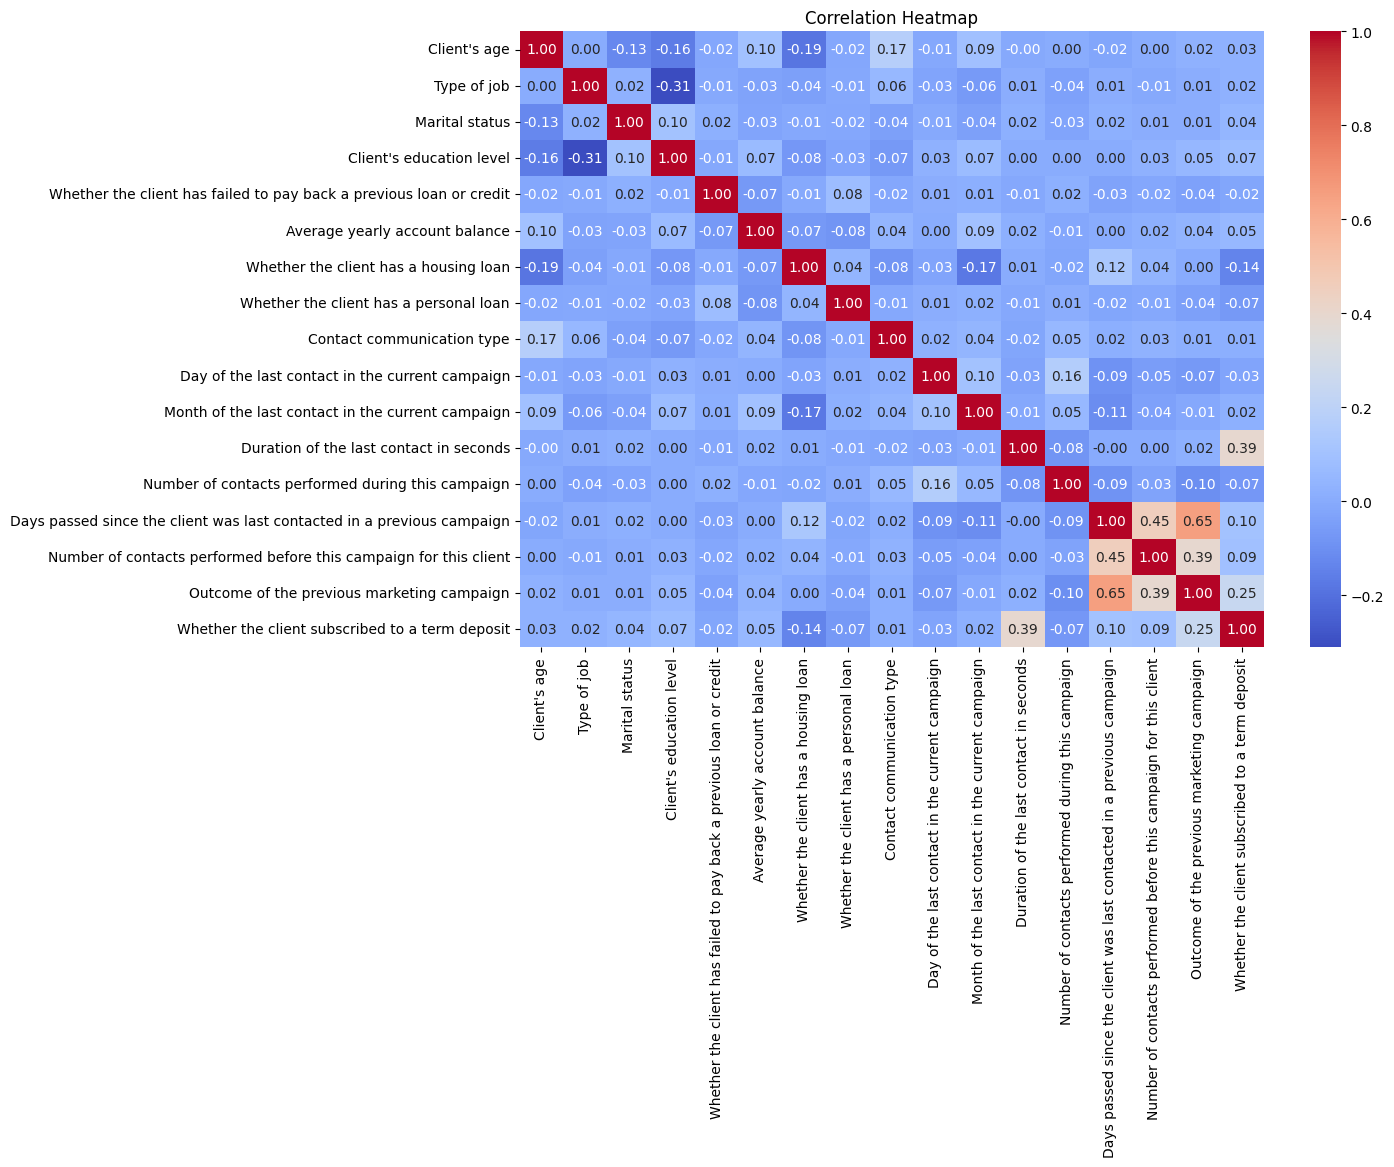

In [ ]:

# Assuming 'df' is your DataFrame
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

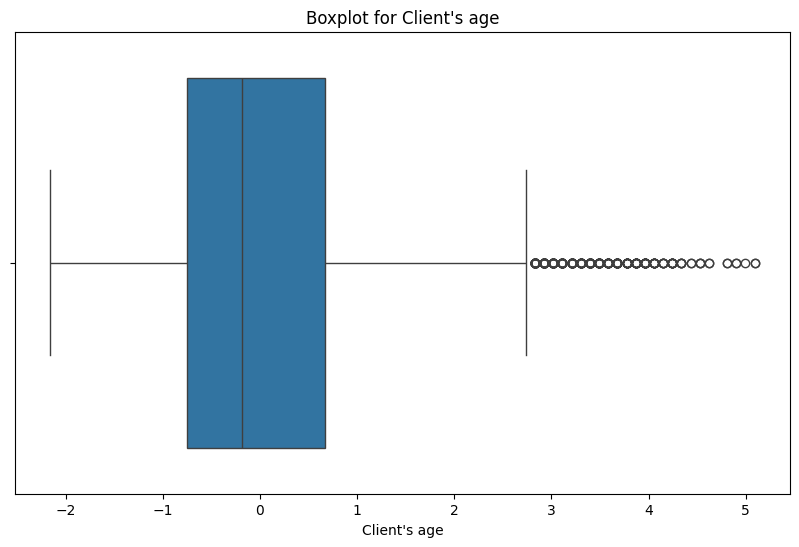

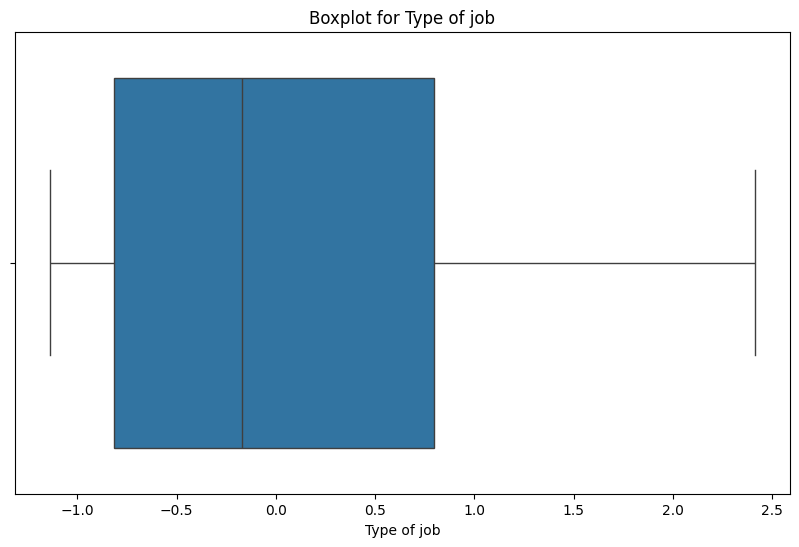

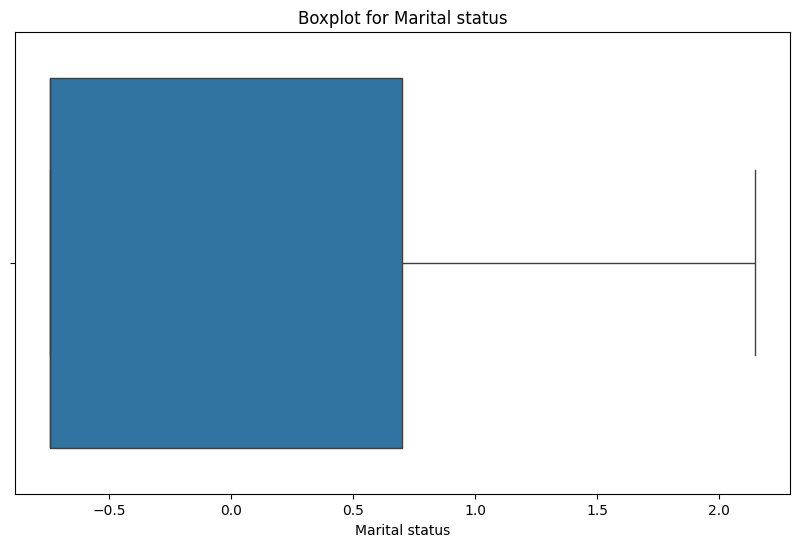

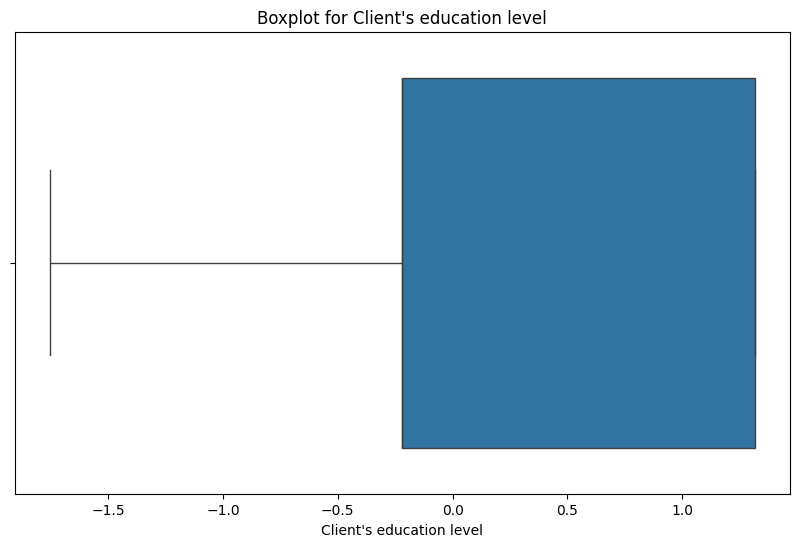

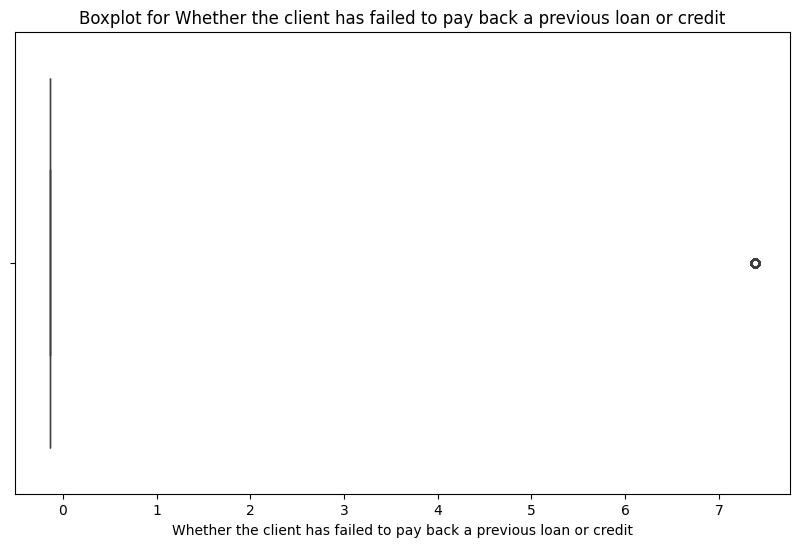

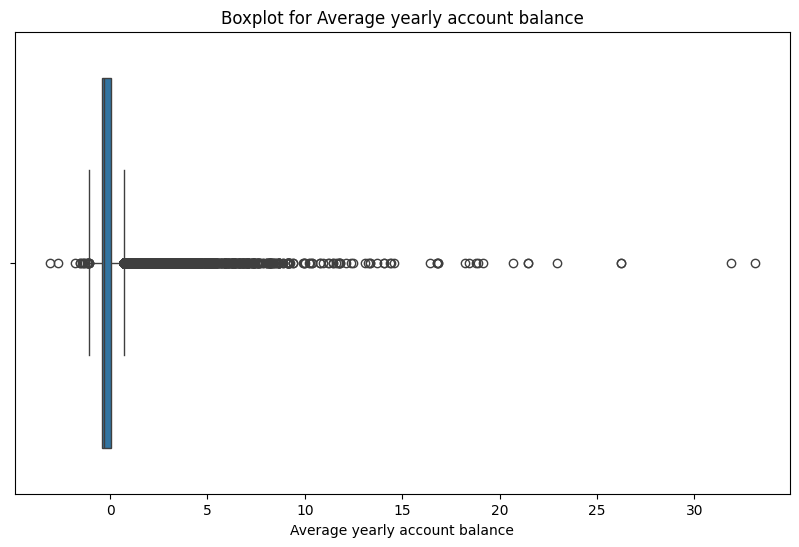

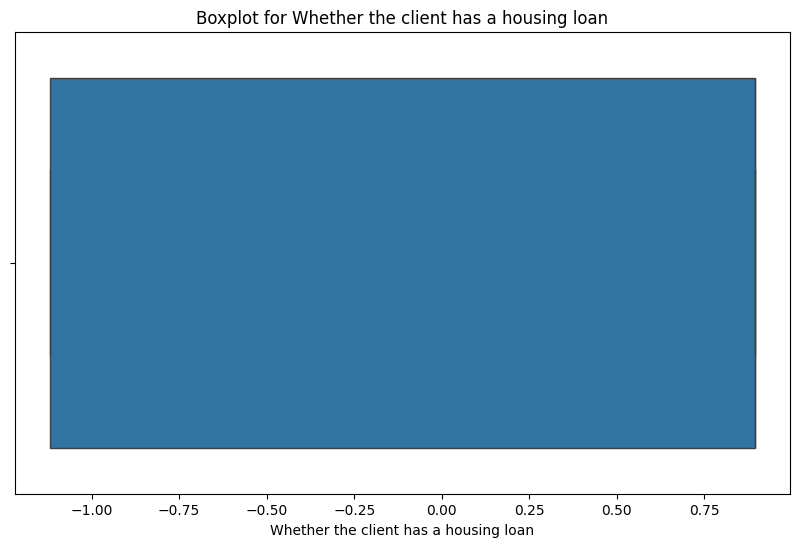

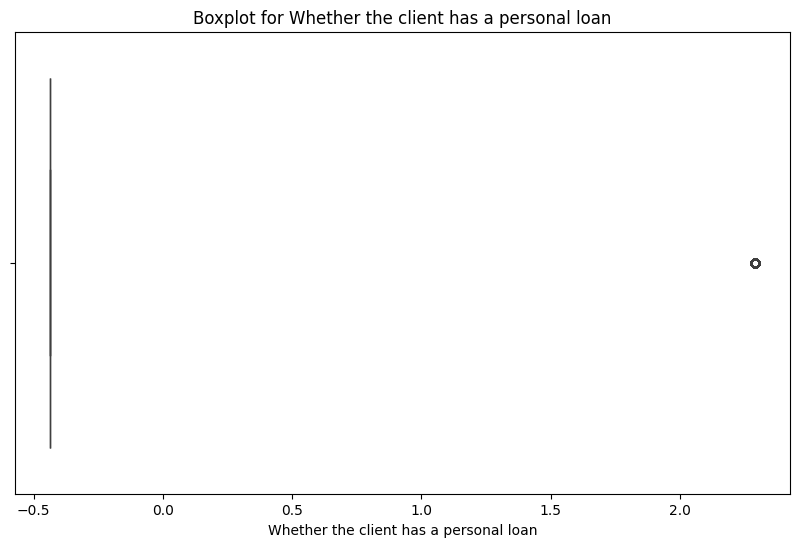

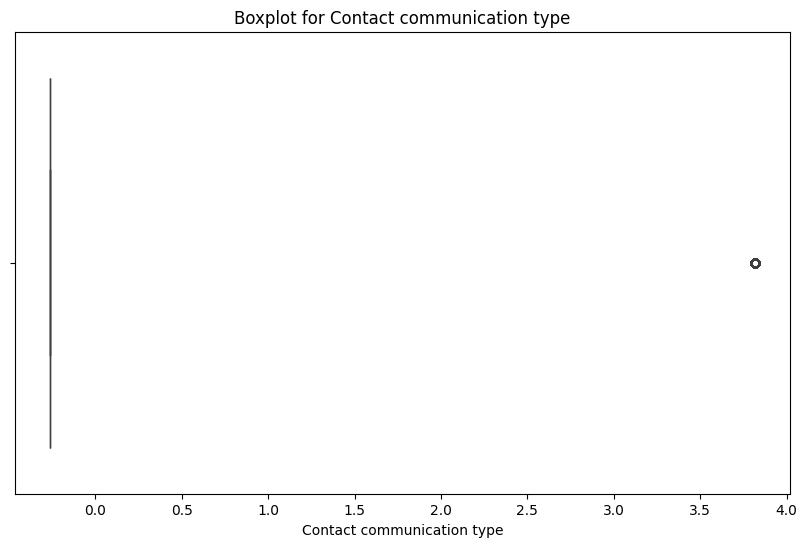

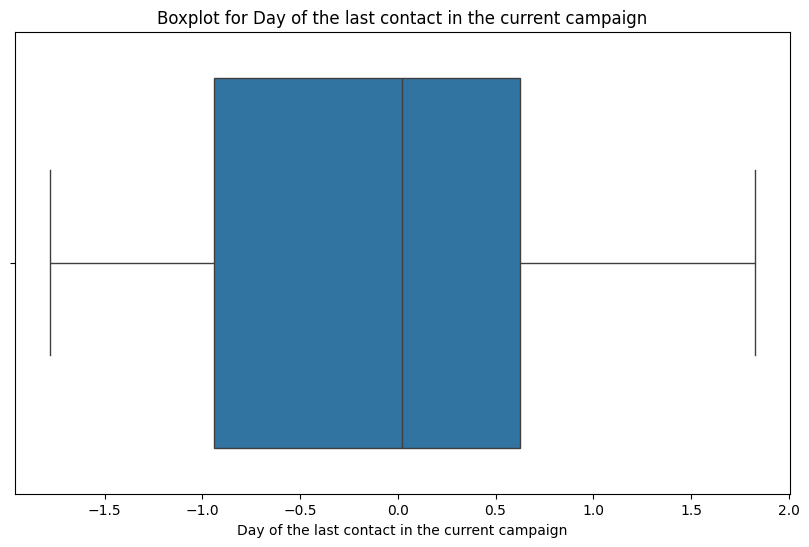

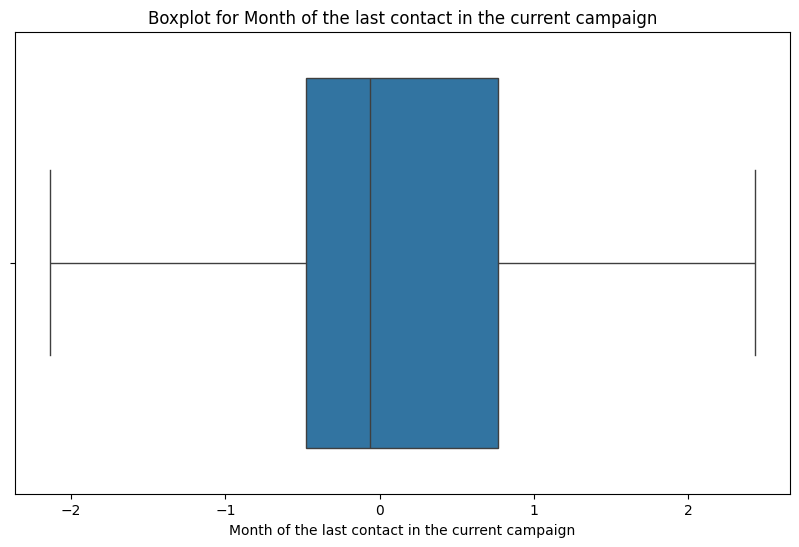

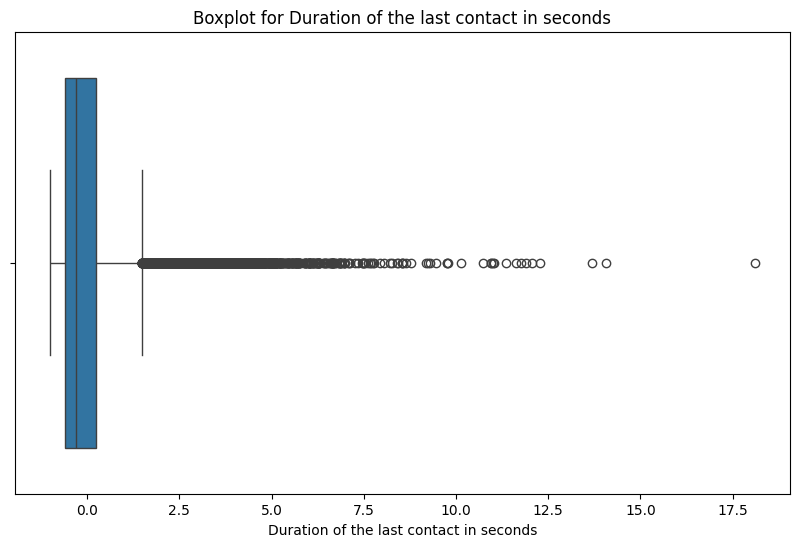

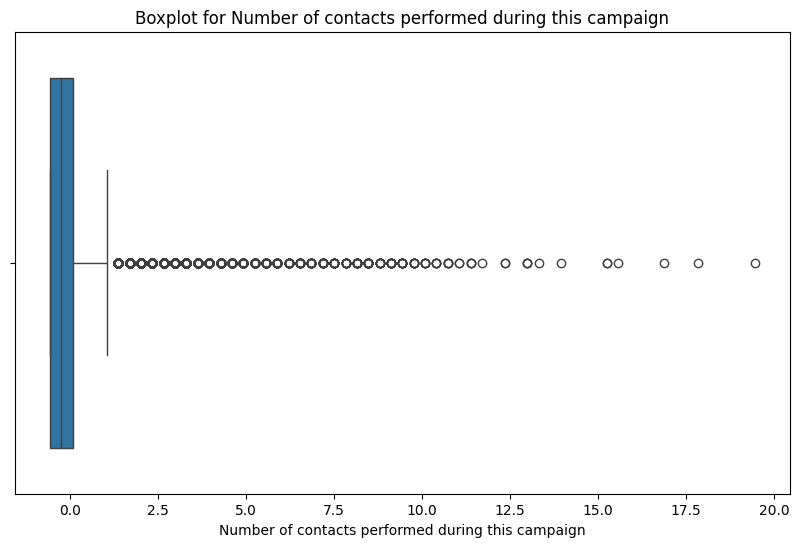

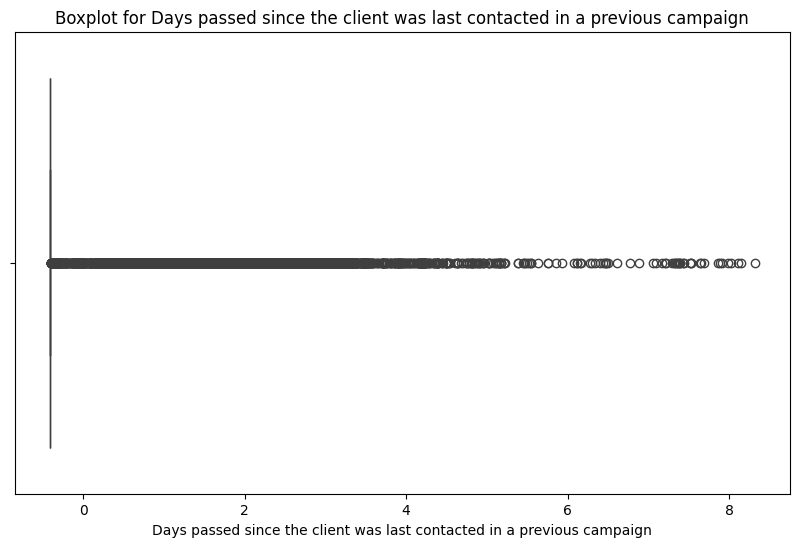

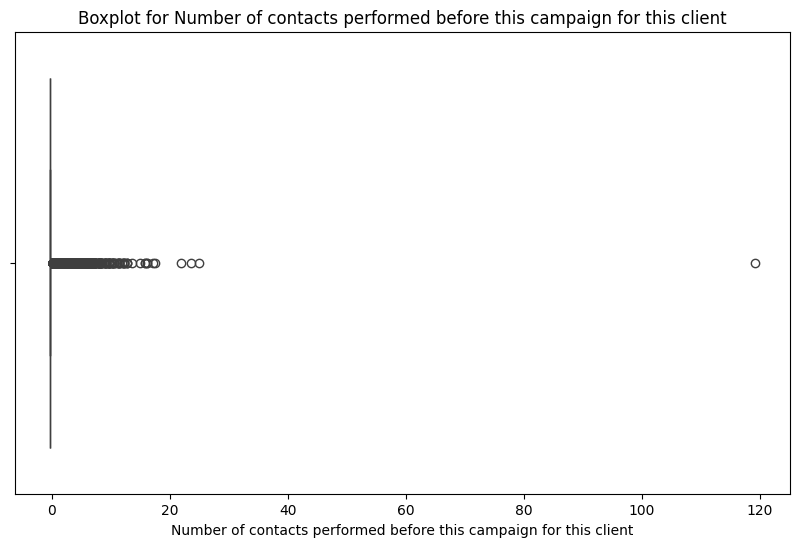

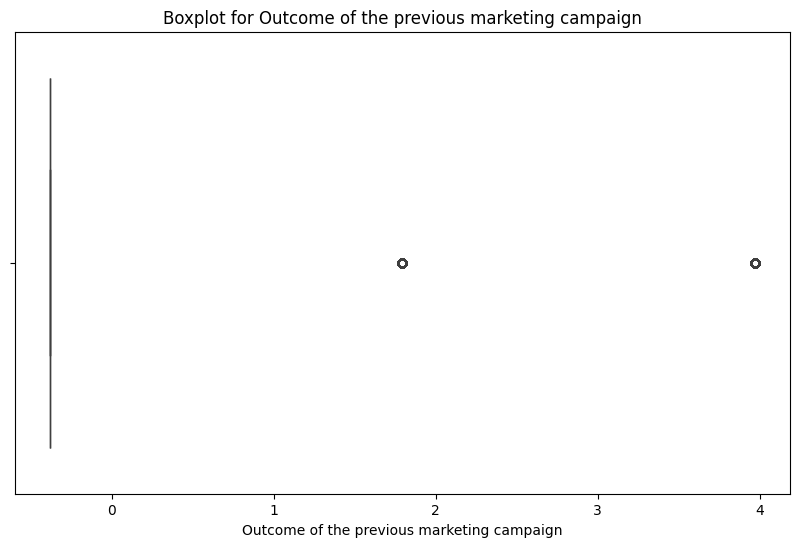

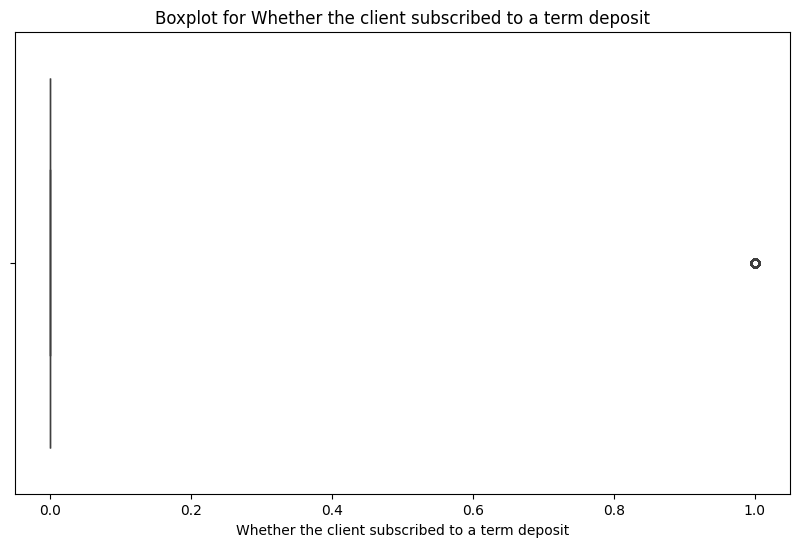

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns in the dataframe
numerical_columns = df.select_dtypes(include=['number']).columns

# Create a boxplot for each numerical column
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Define the target column
X = df.drop(columns=['Whether the client subscribed to a term deposit'])
y = df['Whether the client subscribed to a term deposit']

# First, apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution after SMOTE
print(f'Oversampled class distribution: {Counter(y_resampled)}')

# Optionally, you can use RandomUnderSampler only if necessary
undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)

# Check the new class distribution after undersampling (if used)
print(f'Undersampled class distribution: {Counter(y_resampled)}')


Oversampled class distribution: Counter({0: 39922, 1: 39922})
Undersampled class distribution: Counter({0: 39922, 1: 39922})


In [ ]:
X_resampled

,Client's age,Type of job,Marital status,Client's education level,Whether the client has failed to pay back a previous loan or credit,Average yearly account balance,Whether the client has a housing loan,Whether the client has a personal loan,Contact communication type,Day of the last contact in the current campaign,Month of the last contact in the current campaign,Duration of the last contact in seconds,Number of contacts performed during this campaign,Days passed since the client was last contacted in a previous campaign,Number of contacts performed before this campaign for this client,Outcome of the previous marketing campaign
0,1.606965,-1.138083,-0.740666,1.314507,-0.13549,0.256419,0.893915,-0.436803,-0.262091,-1.298476,-0.475354,0.011016,-0.569351,-0.411009,-0.251940,-0.381169
1,0.288529,-0.815326,0.702458,-0.218740,-0.13549,-0.437895,0.893915,-0.436803,-0.262091,-1.298476,-0.475354,-0.416127,-0.569351,-0.411009,-0.251940,-0.381169
2,-0.747384,-0.492570,-0.740666,-0.218740,-0.13549,-0.446762,0.893915,2.289359,-0.262091,-1.298476,-0.475354,-0.707361,-0.569351,-0.411009,-0.251940,-0.381169
3,0.571051,-0.169813,-0.740666,-0.218740,-0.13549,0.047205,0.893915,-0.436803,-0.262091,-1.298476,-0.475354,-0.645231,-0.569351,-0.411009,-0.251940,-0.381169
4,-0.747384,0.152944,0.702458,-0.218740,-0.13549,-0.447091,-1.118674,-0.436803,-0.262091,-1.298476,-0.475354,-0.233620,-0.569351,-0.411009,-0.251940,-0.381169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46187,-0.675638,-0.169813,-0.740666,-0.218740,-0.13549,-0.297395,0.893915,-0.436803,-0.262091,-0.270443,-0.475354,0.244054,-0.543726,-0.411009,-0.251940,-0.381169
51206,0.991587,-1.138083,-0.740666,1.314507,-0.13549,0.058031,-1.118674,-0.436803,3.815470,-1.095770,0.770490,-0.069077,0.177262,-0.411009,-0.251940,-0.381169
78080,0.100181,0.798457,2.145583,-0.218740,-0.13549,-0.385098,0.893915,-0.436803,-0.262091,-0.026923,-0.475354,2.547330,-0.299728,-0.411009,-0.251940,-0.381169
19066,1.701139,0.475700,-0.740666,-1.751986,-0.13549,0.669263,0.893915,-0.436803,-0.262091,-1.298476,0.770490,0.997328,0.076230,-0.411009,-0.251940,-0.381169


In [ ]:
y_resampled.value_counts()

Whether the client subscribed to a term deposit
0    39922
1    39922
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f'Training data (X_train): {X_train.shape}')
print(f'Testing data (X_test): {X_test.shape}')
print(f'Training labels (y_train): {y_train.shape}')
print(f'Testing labels (y_test): {y_test.shape}')


Training data (X_train): (63875, 16)
Testing data (X_test): (15969, 16)
Training labels (y_train): (63875,)
Testing labels (y_test): (15969,)


✅ Accuracy Score: 0.7972947585947774

✅ Confusion Matrix:
 [[6525 1397]
 [1840 6207]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      7922
           1       0.82      0.77      0.79      8047

    accuracy                           0.80     15969
   macro avg       0.80      0.80      0.80     15969
weighted avg       0.80      0.80      0.80     15969

✅ ROC AUC Score: 0.8805783693107965

🎯 Cross-Validation Results on Training Data:
Accuracy (mean): 0.8058
Precision (mean): 0.8198
Recall (mean): 0.7830
F1 (mean): 0.8009
Roc_auc (mean): 0.8854


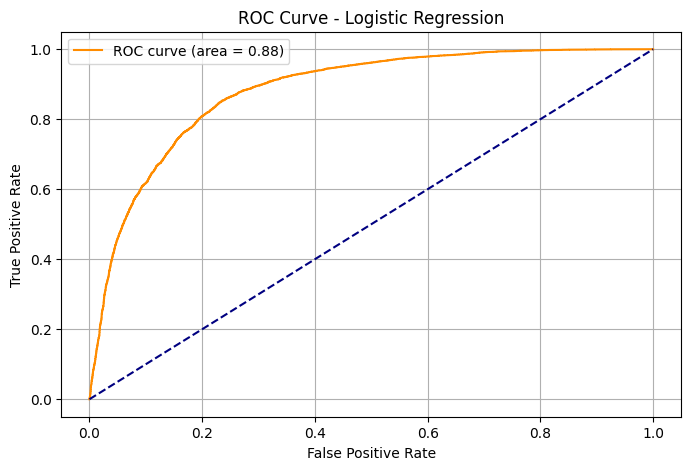

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Step 1: Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 2: Predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Step 3: Evaluation on test set
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Step 4: Cross-validation on the training data
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(log_reg, X_train, y_train, cv=5, scoring=scoring)

print("\n🎯 Cross-Validation Results on Training Data:")
for metric in scoring:
    print(f"{metric.capitalize()} (mean): {cv_results['test_' + metric].mean():.4f}")

# Step 5: Optional - ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


Cross-validation Accuracy Scores: [0.8498452  0.66357001 0.63968149 0.69542137 0.7168768  0.67772617
 0.60030967 0.35965494 0.8164123  0.49679274]
Average Cross-validation Accuracy: 0.6516290677902845


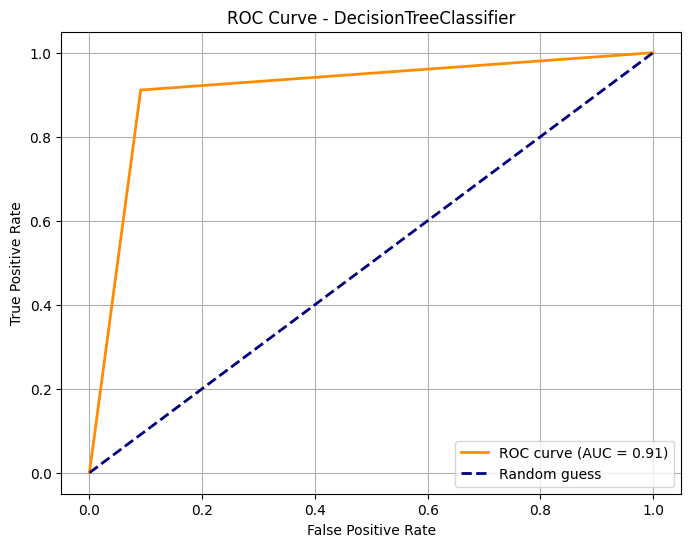

ROC AUC Score: 0.91

✅ Confusion Matrix:
 [[7202  720]
 [ 715 7332]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      7922
           1       0.91      0.91      0.91      8047

    accuracy                           0.91     15969
   macro avg       0.91      0.91      0.91     15969
weighted avg       0.91      0.91      0.91     15969



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Cross-validation (10-fold by default)
cv_scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='accuracy')
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Average Cross-validation Accuracy: {cv_scores.mean()}")

# Train the model using the entire training data for ROC AUC
dt_classifier.fit(X_train, y_train)

# Predict probabilities instead of labels for ROC AUC
y_proba = dt_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DecisionTreeClassifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print the AUC score
print(f"ROC AUC Score: {roc_auc:.2f}")

# Predictions for Confusion Matrix and Classification Report
y_pred = dt_classifier.predict(X_test)

# Confusion Matrix
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


Cross-validation Accuracy Scores: [0.874613   0.82680823 0.83167441 0.80491042 0.80623756 0.85047556
 0.74740102 0.37049325 0.84472462 0.58836541]
Average Cross-validation Accuracy: 0.754570346980688


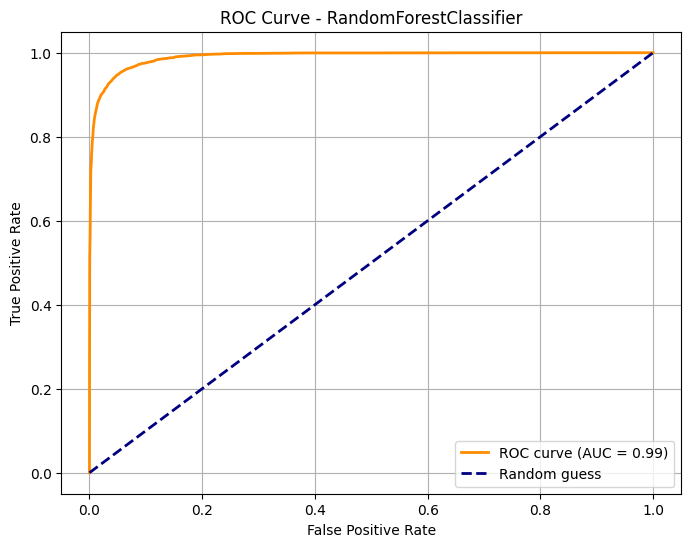

ROC AUC Score: 0.99

✅ Confusion Matrix:
 [[7349  573]
 [ 292 7755]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      7922
           1       0.93      0.96      0.95      8047

    accuracy                           0.95     15969
   macro avg       0.95      0.95      0.95     15969
weighted avg       0.95      0.95      0.95     15969



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Cross-validation (10-fold by default)
cv_scores = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy')
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Average Cross-validation Accuracy: {cv_scores.mean()}")

# Train the model using the entire training data for ROC AUC
rf_classifier.fit(X_train, y_train)

# Predict probabilities instead of labels for ROC AUC
y_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForestClassifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print the AUC score
print(f"ROC AUC Score: {roc_auc:.2f}")

# Predictions for Confusion Matrix and Classification Report
y_pred = rf_classifier.predict(X_test)

# Confusion Matrix
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


/Users/mohamedafrith/Desktop/final_project/ds_env/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:12:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy Score: 0.9435781827290375

✅ Confusion Matrix:
 [[7537  385]
 [ 516 7531]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      7922
           1       0.95      0.94      0.94      8047

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969

✅ ROC AUC Score: 0.9896816283857709


/Users/mohamedafrith/Desktop/final_project/ds_env/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:12:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mohamedafrith/Desktop/final_project/ds_env/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:12:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mohamedafrith/Desktop/final_project/ds_env/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:12:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mohamedafrith/Desktop/final_project/ds_env/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:12:27] WARNING: /Users/runner/work/xgboost/xgboost/src/lea

✅ Cross-validated ROC AUC: 0.5462598749579338


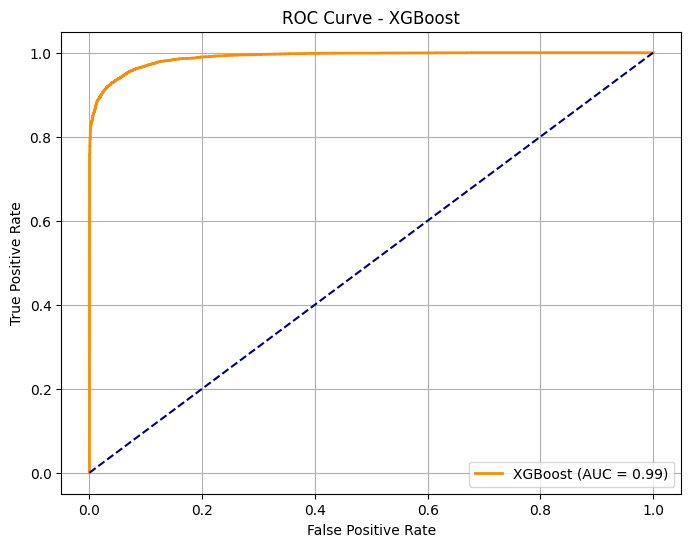

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Step 1: Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Step 2: Predict
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Step 3: Evaluation
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Step 4: Cross-validation score
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='roc_auc')
print("✅ Cross-validated ROC AUC:", cv_scores.mean())

# Step 5: ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()


[LightGBM] [Info] Number of positive: 31875, number of negative: 32000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3409
[LightGBM] [Info] Number of data points in the train set: 63875, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499022 -> initscore=-0.003914
[LightGBM] [Info] Start training from score -0.003914
✅ Accuracy Score: 0.9395704176842633

✅ Confusion Matrix:
 [[7480  442]
 [ 523 7524]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7922
           1       0.94      0.94      0.94      8047

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969

✅ 

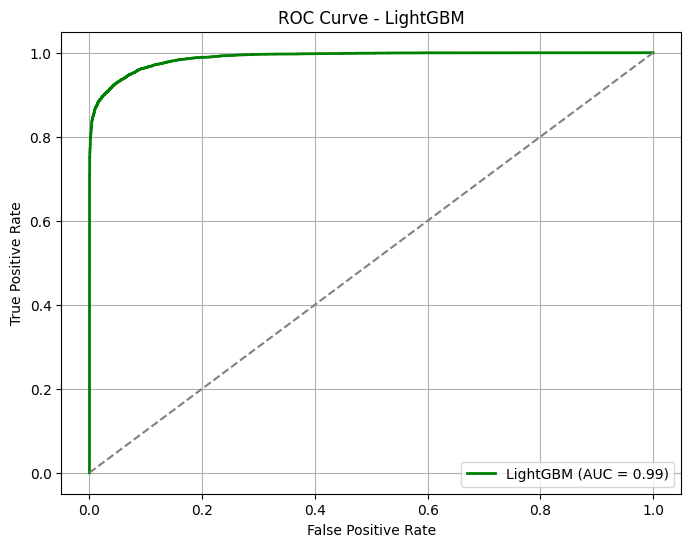

✅ Model saved as 'lightgbm_model.pkl'


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import joblib  # For saving the model

# Step 1: Train LightGBM
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Step 2: Predict
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Step 3: Evaluation
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Step 4: Cross-validation score
cv_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='roc_auc')
print("✅ Cross-validated ROC AUC:", cv_scores.mean())

# Step 5: ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='LightGBM (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Step 6: Save the model using joblib
joblib.dump(lgb_model, 'lightgbm_model.pkl')
print("✅ Model saved as 'lightgbm_model.pkl'")
